<a href="https://colab.research.google.com/github/ag0466154-cpu/Estadistica2025B/blob/main/Test_energy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ag0466154-cpu/Estadistica2025B/refs/heads/main/test_energy_data.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [2]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [3]:
df.columns = ['building_type', 'square_footage', 'number_of_occupants',
       'appliances_used', 'average_temperature', 'day_of_week',
       'energy_consumption']

In [4]:
df.columns

Index(['building_type', 'square_footage', 'number_of_occupants',
       'appliances_used', 'average_temperature', 'day_of_week',
       'energy_consumption'],
      dtype='object')

In [5]:
df["building_type"].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [6]:
df["building_type"] = df["building_type"].map({"Residential": 0, "Commercial": 1,"Industrial": 2})


In [7]:
df["day_of_week"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [8]:
df["day_of_week"] = df['day_of_week'].map({"Weekday": 0, "Weekend": 1 })
df

,building_type,square_footage,number_of_occupants,appliances_used,average_temperature,day_of_week,energy_consumption
0,0,24563,15,4,28.52,0,2865.57
1,1,27583,56,23,23.07,1,4283.80
2,1,45313,4,44,33.56,0,5067.83
3,0,41625,84,17,27.39,1,4624.30
4,0,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,1,3010.81
96,0,37943,50,23,21.73,1,4248.49
97,1,1558,27,29,16.86,1,2843.60
98,2,2145,56,12,11.77,1,3348.39


In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols('energy_consumption ~ C(building_type) + (square_footage) + (number_of_occupants) + (appliances_used) + (average_temperature) + C(day_of_week)',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(building_type),2.0,1.478319e+07,7.391595e+06,3.746118e+10,0.000000e+00
C(day_of_week),1.0,2.727974e+06,2.727974e+06,1.382558e+10,0.000000e+00
square_footage,1.0,3.387918e+07,3.387918e+07,1.717023e+11,0.000000e+00
number_of_occupants,1.0,9.275636e+06,9.275636e+06,4.700965e+10,0.000000e+00
appliances_used,1.0,7.842723e+06,7.842723e+06,3.974753e+10,0.000000e+00
average_temperature,1.0,1.137355e+05,1.137355e+05,5.764203e+08,1.815926e-314
Residual,92.0,1.815284e-02,1.973135e-04,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 727.5898 0.0006  280.8689 1174.3106   True
     0      2  822.394    0.0  408.7494 1236.0386   True
     1      2  94.8042  0.877 -367.1835  556.7919  False
--------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

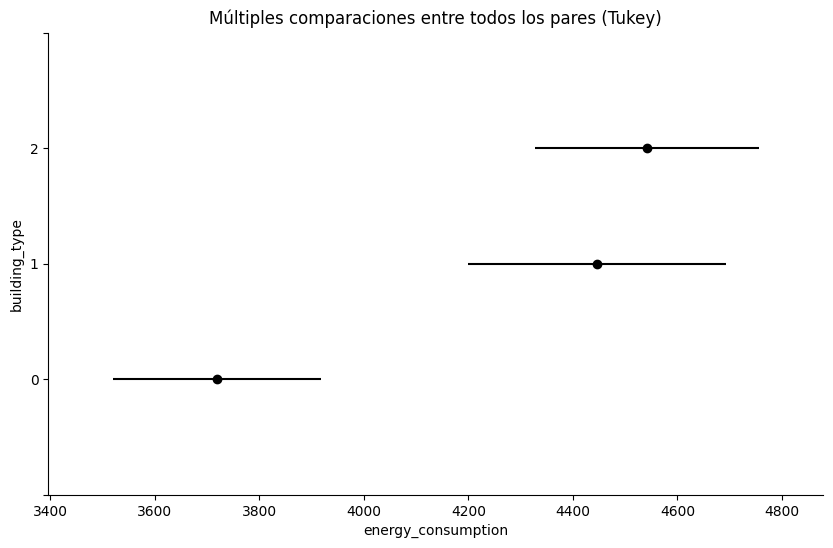

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['energy_consumption'], # Variable de respuesta
    groups=df['building_type'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="building_type", xlabel="energy_consumption")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------
     0      1 -282.6771 0.092 -612.3796 47.0253  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

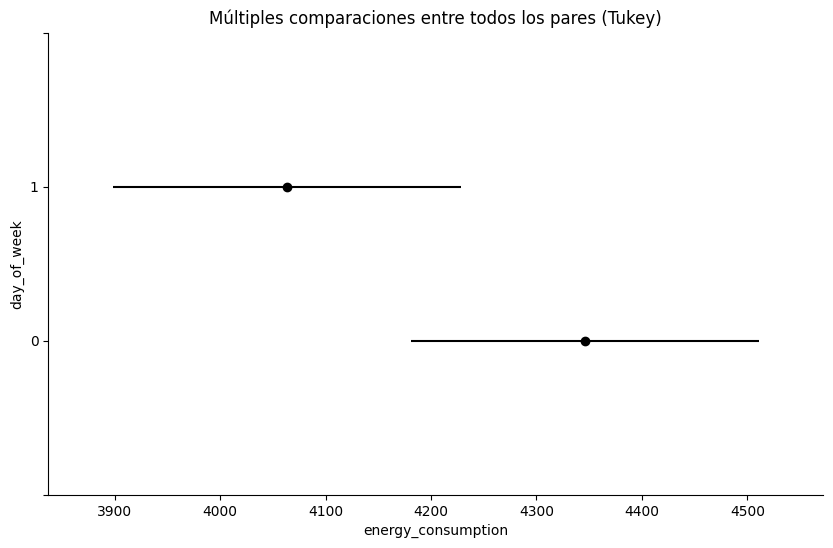

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['energy_consumption'], # Variable de respuesta
    groups=df['day_of_week'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="day_of_week", xlabel="energy_consumption")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

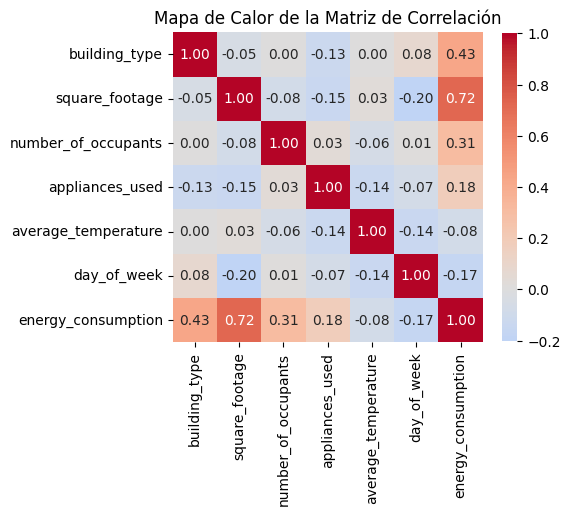

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Coeficiente de determinación:  1.0000

valor-p de Shapiro:  0.0085

valor_p de Breusch-Pagan:  0.1711



,df,sum_sq,mean_sq,F,PR(>F)
building_type,1.0,1.286049e+07,1.286049e+07,6.588276e+10,0.000000e+00
square_footage,1.0,3.820291e+07,3.820291e+07,1.957090e+11,0.000000e+00
number_of_occupants,1.0,9.310880e+06,9.310880e+06,4.769853e+10,0.000000e+00
appliances_used,1.0,8.098515e+06,8.098515e+06,4.148773e+10,0.000000e+00
average_temperature,1.0,9.281685e+04,9.281685e+04,4.754897e+08,9.202873e-314
day_of_week,1.0,5.682145e+04,5.682145e+04,2.910895e+08,7.477313e-304
Residual,93.0,1.815385e-02,1.952027e-04,NaN,NaN


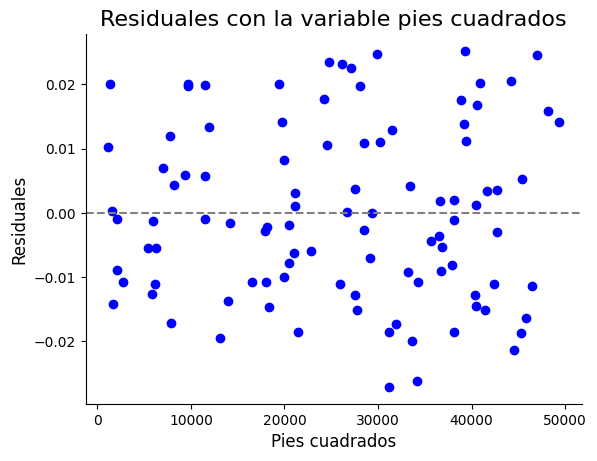

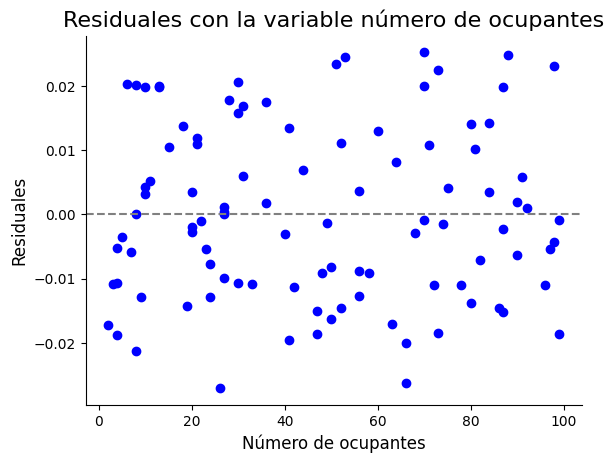

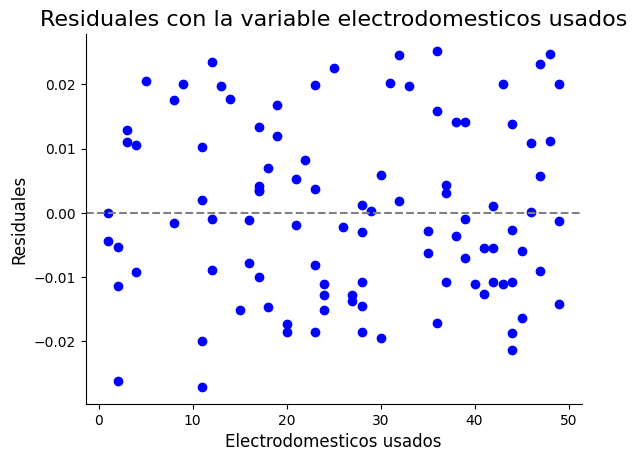

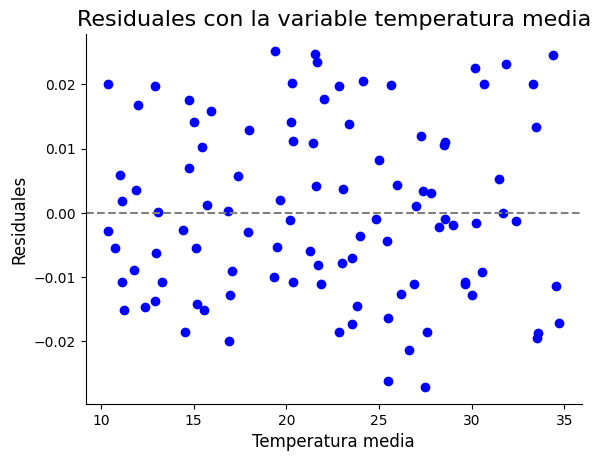

In [13]:
x = df[["building_type","square_footage","number_of_occupants","appliances_used","average_temperature","day_of_week"]]
y = df["energy_consumption"]

# recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# residuales y gráficos de dispersión.

residuales = modelo.resid
plt.figure()
plt.scatter(x["square_footage"], residuales, color = 'blue')
plt.xlabel('Pies cuadrados', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable pies cuadrados", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["number_of_occupants"], residuales, color = 'blue')
plt.xlabel('Número de ocupantes', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable número de ocupantes", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["appliances_used"], residuales, color = 'blue')
plt.xlabel('Electrodomesticos usados', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable electrodomesticos usados", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["average_temperature"], residuales, color = 'blue')
plt.xlabel('Temperatura media', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable temperatura media", fontsize = 16)

# prueba de Shapiro
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# tabla ANOVA
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols(
    "energy_consumption ~ building_type + square_footage + number_of_occupants + appliances_used + average_temperature + day_of_week",
    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

In [14]:
modelo.params

,0
const,1550.014890
building_type,499.997678
square_footage,0.050000
number_of_occupants,9.999942
appliances_used,19.999827
average_temperature,-5.000058
day_of_week,-50.005180
